In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
decisionNode = dict(boxstyle="sawtooth",fc = "0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, xycoords = "axes fraction", \
                           xytext = centerPt,  textcoords = 'axes fraction', \
                           va = 'center', ha = 'center', bbox = nodeType, \
                           arrowprops = arrow_args)

In [8]:
def createPlot():
    fig = plt.figure(1, facecolor='white')
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode(u'决策节点', (0.5,0.1), (0.1, 0.5), decisionNode)
    plotNode(u'叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

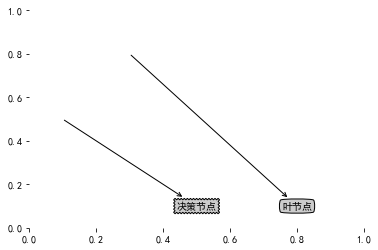

In [9]:
createPlot()

In [2]:
import matplotlib.pyplot as plt
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
             numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [3]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing':{0:'no',1:{'flippers':\
                    {0:'no',1:'yes'}}}},
                   {'no surfacing':{0:'no',1:{'flippers':\
                    {0:{'head':{0:'no',1:'yes'}},1:'no'}}}}
                 ]
    return listOfTrees[i]

In [4]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [5]:
myTree = retrieveTree(0)

In [6]:
getNumLeafs(myTree)

3

In [7]:
getTreeDepth(myTree)

2

In [8]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), \
                     cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks = [], yticks = [])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

In [9]:
myTree=retrieveTree(0)

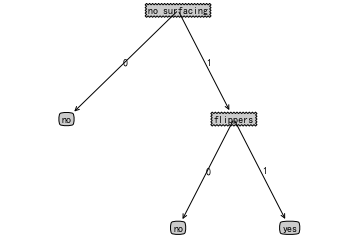

In [10]:
createPlot(myTree)

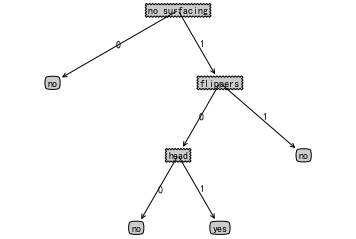

In [11]:
myTree=retrieveTree(1)
createPlot(myTree)

In [12]:
myTree['no surfacing'][3] = 'mabey'

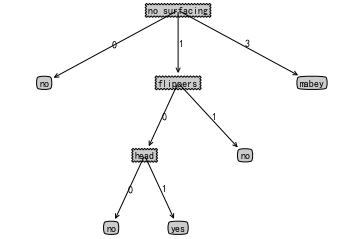

In [13]:
createPlot(myTree)

In [38]:
fr = open('buyHouse.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['ages','prescript','astigmatic','tearRate']
print(lenses)
print(lensesLabels)

[['27', '男', '15W', '否', '否'], ['47', '女', '30W', '是', '是'], ['32', '男', '12W', '否', '否'], ['24', '男', '45W', '否', '是'], ['45', '男', '30W', '是', '否'], ['56', '男', '32W', '是', '是'], ['31', '男', '15W', '否', '否'], ['23', '女', '30W', '是', '否']]
['ages', 'prescript', 'astigmatic', 'tearRate']
